In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import seaborn as sns

In [2]:
plt.style.use('grayscale')

In [3]:
# load R %magic
import rpy2
%load_ext rpy2.ipython

In [4]:
data=pd.read_csv("resultados_nov3.csv", sep=";", decimal=".")
data.sample(15)

,item_code,n,mean,sd,median,trimmed,range,skew,kurtosis,se,...,infitZ,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,judge_agree,process,n_jueces
1,EM_21a,40,0.525000,0.505736,1.0,0.531250,1,-0.096394,-2.000000,0.079964,...,-0.406192,1.000000,1.000000,0.333333,0.733333,0.333333,0.733333,0.000000,0,1
32,LF_28a2,33,0.090909,0.291937,0.0,0.000000,1,3.000000,6.000000,0.050820,...,0.524957,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,transfer,2
21,II_13a,39,0.666667,0.477567,1.0,0.696970,1,-0.680085,-2.000000,0.076472,...,-0.325589,0.333333,1.000000,0.333333,1.000000,0.733333,0.733333,1.000000,transfer,2
125,VB_15a,40,0.575000,0.500641,1.0,0.593750,1,-0.292126,-2.000000,0.079158,...,-0.974374,0.000000,0.400000,1.000000,0.666667,0.400000,0.400000,1.000000,transfer,3
44,ME_17d,40,0.550000,0.503831,1.0,0.562500,1,-0.193517,-2.000000,0.079663,...,-2.000000,1.000000,0.642857,0.642857,0.100000,0.000000,0.000000,1.000000,transfer,2
42,ME_17b,39,0.435897,0.502356,0.0,0.424242,1,0.248664,-2.000000,0.080441,...,-2.000000,1.000000,1.000000,0.642857,0.500000,0.100000,0.100000,1.000000,transfer,4
38,LP_15c,40,0.500000,0.506370,0.5,0.500000,1,0.000000,-2.000000,0.080064,...,2.000000,0.333333,0.733333,0.333333,0.200000,0.333333,0.200000,0.000000,0,1
40,ME_10,42,0.380952,0.491507,0.0,0.352941,1,0.472885,-2.000000,0.075841,...,-1.000000,1.000000,0.500000,0.100000,0.000000,0.000000,0.000000,1.000000,transfer,3
113,SE_4a,40,0.350000,0.483046,0.0,0.312500,1,0.605533,-2.000000,0.076376,...,-0.229063,0.666667,1.000000,1.000000,0.666667,0.000000,0.666667,0.000000,0,1
131,VB_42,40,0.500000,0.506370,0.5,0.500000,1,0.000000,-2.000000,0.080064,...,0.055363,0.766667,0.500000,0.100000,0.100000,1.000000,0.766667,1.000000,transfer,2


# Propiedades de los reactivos

In [28]:
psicom_dat=data[['n', 'mean', 'IRT_difficulty', 'Chisq', 'df', 'p_value', 'outfitMSQ', 'infitMSQ']]

In [32]:
min_dat=psicom_dat.min(axis=0)
max_dat=psicom_dat.max(axis=0)
mean_dat=psicom_dat.mean(axis=0)
sd_dat=psicom_dat.sd(axis=0)
# pd.DataFrame([])

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ,outfitZ,infitZ
0,26.0,0.054054,-2.0,4.0,17.0,0.0,0.124726,0.429716,-2.0,-2.0
1,111.0,0.868421,3.0,156.0,110.0,1.0,4.000000,2.000000,4.0,3.0


In [33]:
psicom_dat.describe()

,n,mean,IRT_difficulty,Chisq,df,p_value,outfitMSQ,infitMSQ,outfitZ,infitZ
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,40.395522,0.410631,0.441205,39.313433,38.417910,0.478364,0.947289,0.950014,0.015312,-0.064280
std,8.802784,0.205910,1.013602,14.662323,9.433024,0.248625,0.308114,0.123527,0.886322,0.813590
min,26.000000,0.054054,-2.000000,4.000000,17.000000,0.000000,0.124726,0.429716,-2.000000,-2.000000
25%,39.000000,0.250000,-0.200671,34.000000,37.000000,0.293965,0.871670,0.900296,-0.570082,-0.585349
50%,40.000000,0.400000,0.405465,38.000000,39.000000,0.475851,0.971459,0.977999,-0.056326,-0.017759
75%,40.000000,0.550000,1.000000,43.000000,39.000000,0.651403,1.000000,1.000000,0.531584,0.439433
max,111.000000,0.868421,3.000000,156.000000,110.000000,1.000000,4.000000,2.000000,4.000000,3.000000


# Análisis de desempeño

In [5]:
pd.crosstab(data.process, columns="count")

col_0,count
process,
0,29
retention,10
transfer,95


In [6]:
dat_2=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code","IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA","process"]]
dat_2.set_index("item_code", inplace=True)
dat_2.sample(15)

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process
item_code,,,,,,,,
FN_27b,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,transfer
MS_43a,0.969401,1.000000,1.000000,1.000000,0.857143,0.666667,0.857143,transfer
ME_79,0.730888,0.766667,0.642857,0.642857,1.000000,0.766667,0.642857,transfer
ME_17b,0.257829,1.000000,1.000000,0.642857,0.500000,0.100000,0.100000,transfer
MX_16a,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,transfer
FN_24b,-0.302281,0.766667,0.766667,0.642857,0.766667,0.100000,0.500000,transfer
FN_17c,1.000000,1.000000,0.733333,0.333333,0.333333,0.333333,0.333333,transfer
LF_33b,0.318454,1.000000,0.500000,0.100000,0.100000,0.500000,0.500000,transfer
PS_51b,-0.362905,1.000000,1.000000,1.000000,1.000000,0.333333,0.333333,transfer


Text(0.5, 1.0, 'IRT difficulty')

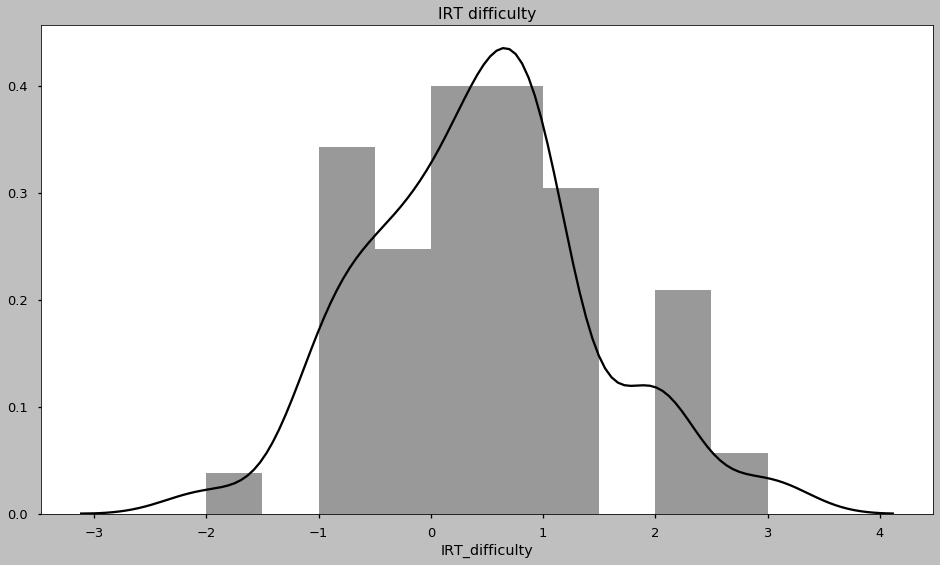

In [7]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
# plt.legend()

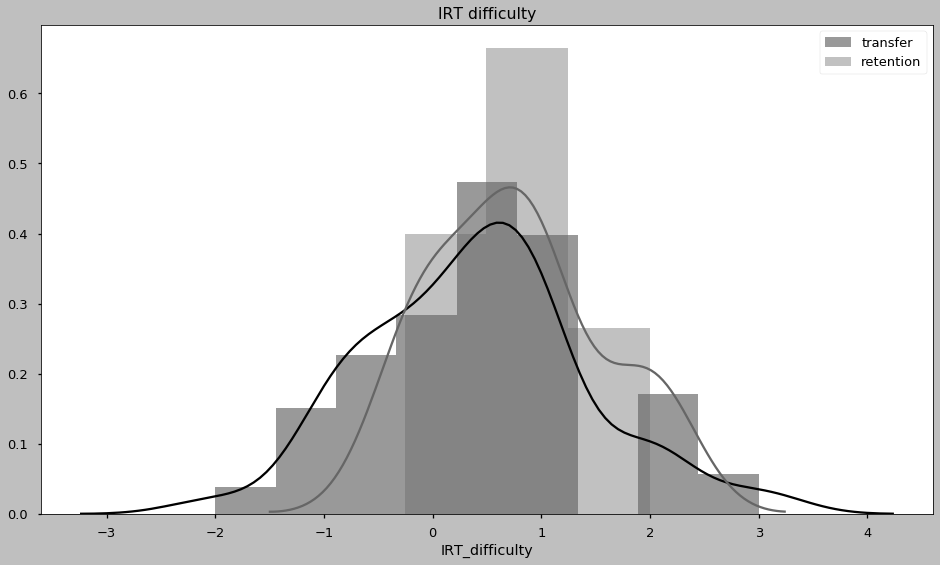

In [8]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.IRT_difficulty[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("IRT difficulty")
plt.legend()

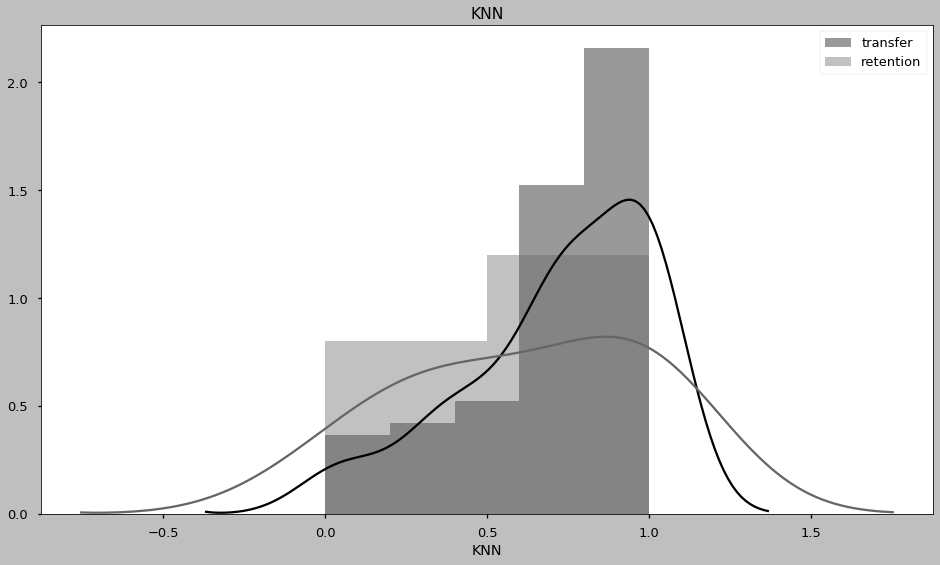

In [9]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.KNN[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.KNN[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("KNN")
plt.legend()

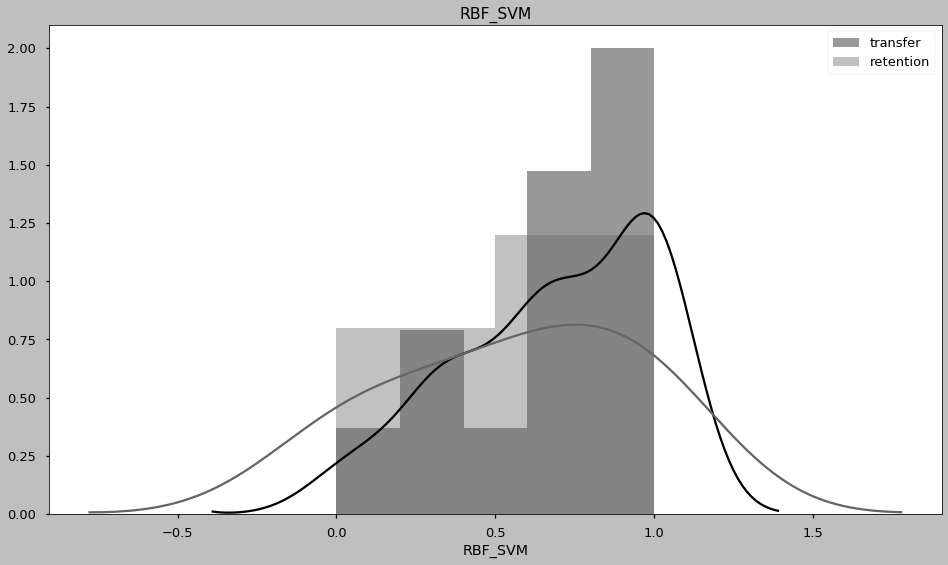

In [10]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.RBF_SVM[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.RBF_SVM[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("RBF_SVM")
plt.legend()

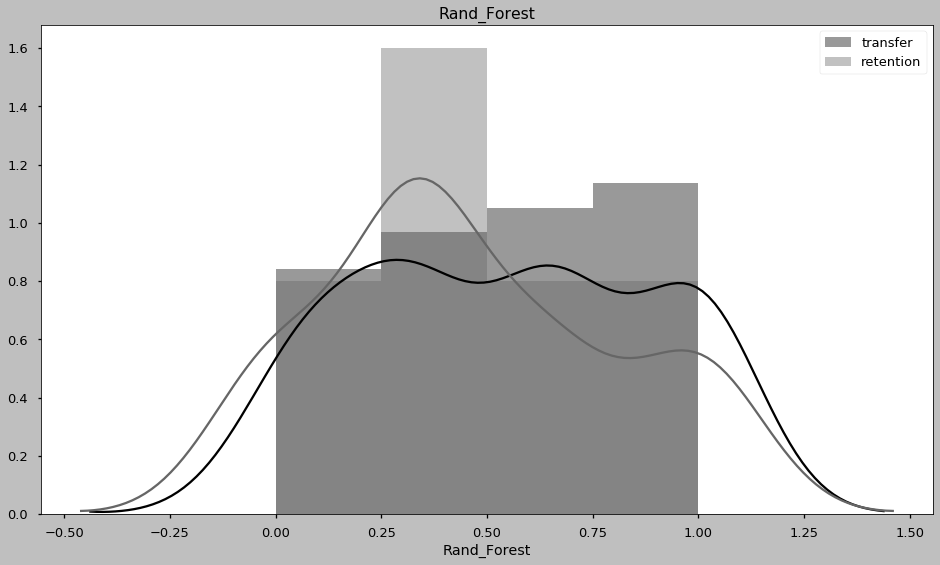

In [11]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Rand_Forest[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Rand_Forest[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Rand_Forest")
plt.legend()

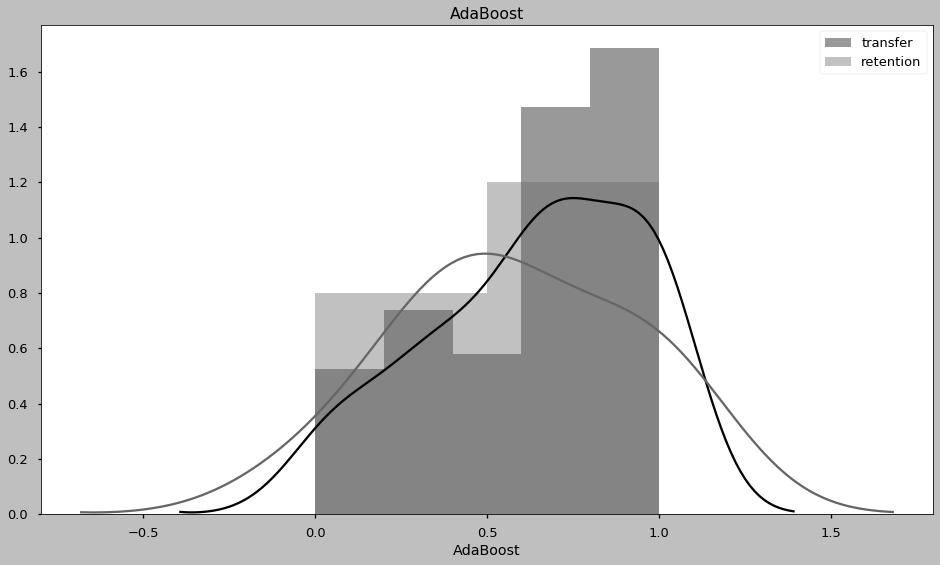

In [12]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.AdaBoost[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.AdaBoost[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("AdaBoost")
plt.legend()

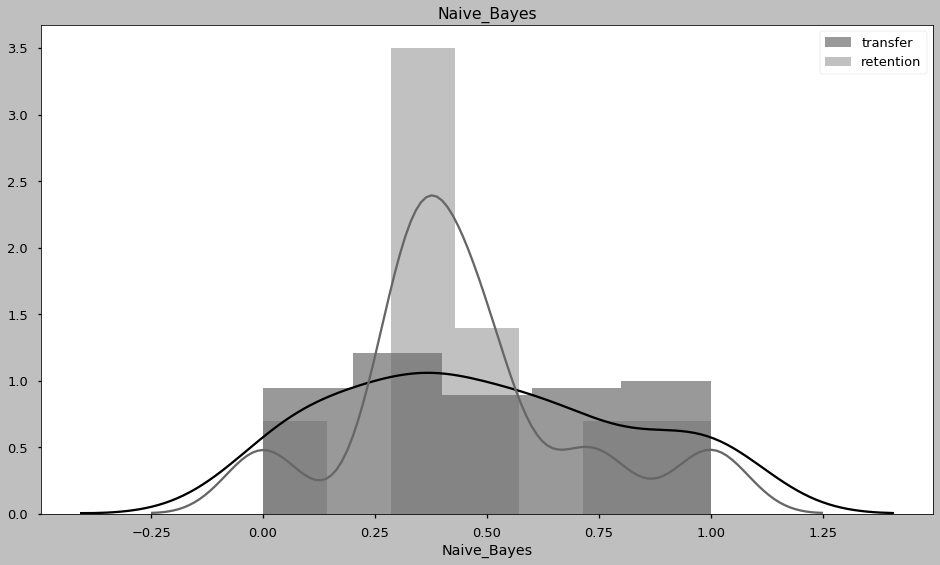

In [13]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.Naive_Bayes[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("Naive_Bayes")
plt.legend()

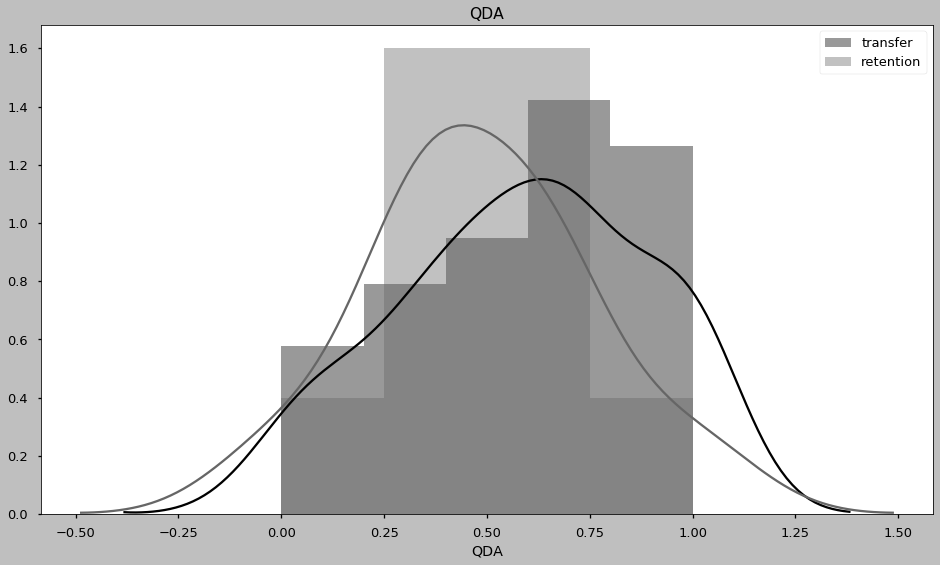

In [14]:
plt.figure(figsize=(16,9))
sns.distplot(dat_2.QDA[dat_2.process=="transfer"], label="transfer")
sns.distplot(dat_2.QDA[dat_2.process=="retention"], label="retention")
# sns.distplot(dat_2.IRT_difficulty, label="general")
plt.title("QDA")
plt.legend()


In [15]:
dat_heat=pd.concat([data.loc[(data.process=="transfer")|(data.process=="retention"),["IRT_difficulty","KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA"]],
                      pd.get_dummies(data.loc[(data.process=="transfer")|(data.process=="retention"),["process"]])], axis=1, sort=False)
dat_heat.index=data.loc[(data.process=="transfer")|(data.process=="retention"),["item_code"]]
dat_heat.sample(15)          

,IRT_difficulty,KNN,RBF_SVM,Rand_Forest,AdaBoost,Naive_Bayes,QDA,process_retention,process_transfer
"(ME_17b,)",0.257829,1.000000,1.000000,0.642857,0.500000,0.100000,0.100000,0,1
"(ST_54b2,)",2.000000,0.200000,0.333333,0.333333,0.333333,0.500000,0.500000,1,0
"(MS_30b,)",-1.000000,0.642857,1.000000,0.642857,0.642857,0.500000,0.300000,0,1
"(MS_43a,)",0.969401,1.000000,1.000000,1.000000,0.857143,0.666667,0.857143,0,1
"(LF_13a,)",0.356675,0.333333,0.333333,0.333333,0.733333,0.333333,0.333333,0,1
"(ME_38a,)",1.000000,0.766667,0.642857,0.642857,0.642857,0.100000,0.100000,0,1
"(ME_73,)",-0.624154,1.000000,0.857143,0.000000,0.666667,0.857143,0.666667,0,1
"(EM_35,)",-0.200671,0.500000,0.766667,0.642857,0.500000,0.500000,1.000000,0,1
"(MX_10,)",0.619039,0.733333,0.333333,0.333333,0.333333,0.200000,0.200000,0,1
"(SE_22b,)",-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0,1


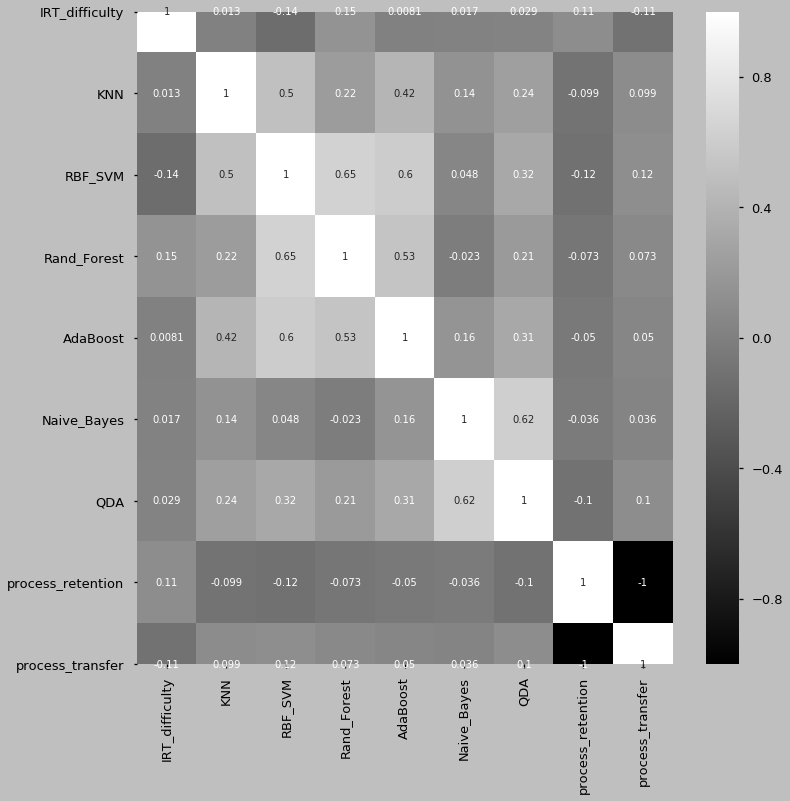

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(dat_heat.corr(), annot=True, vmin=-1, vmax=1,cmap="gray")

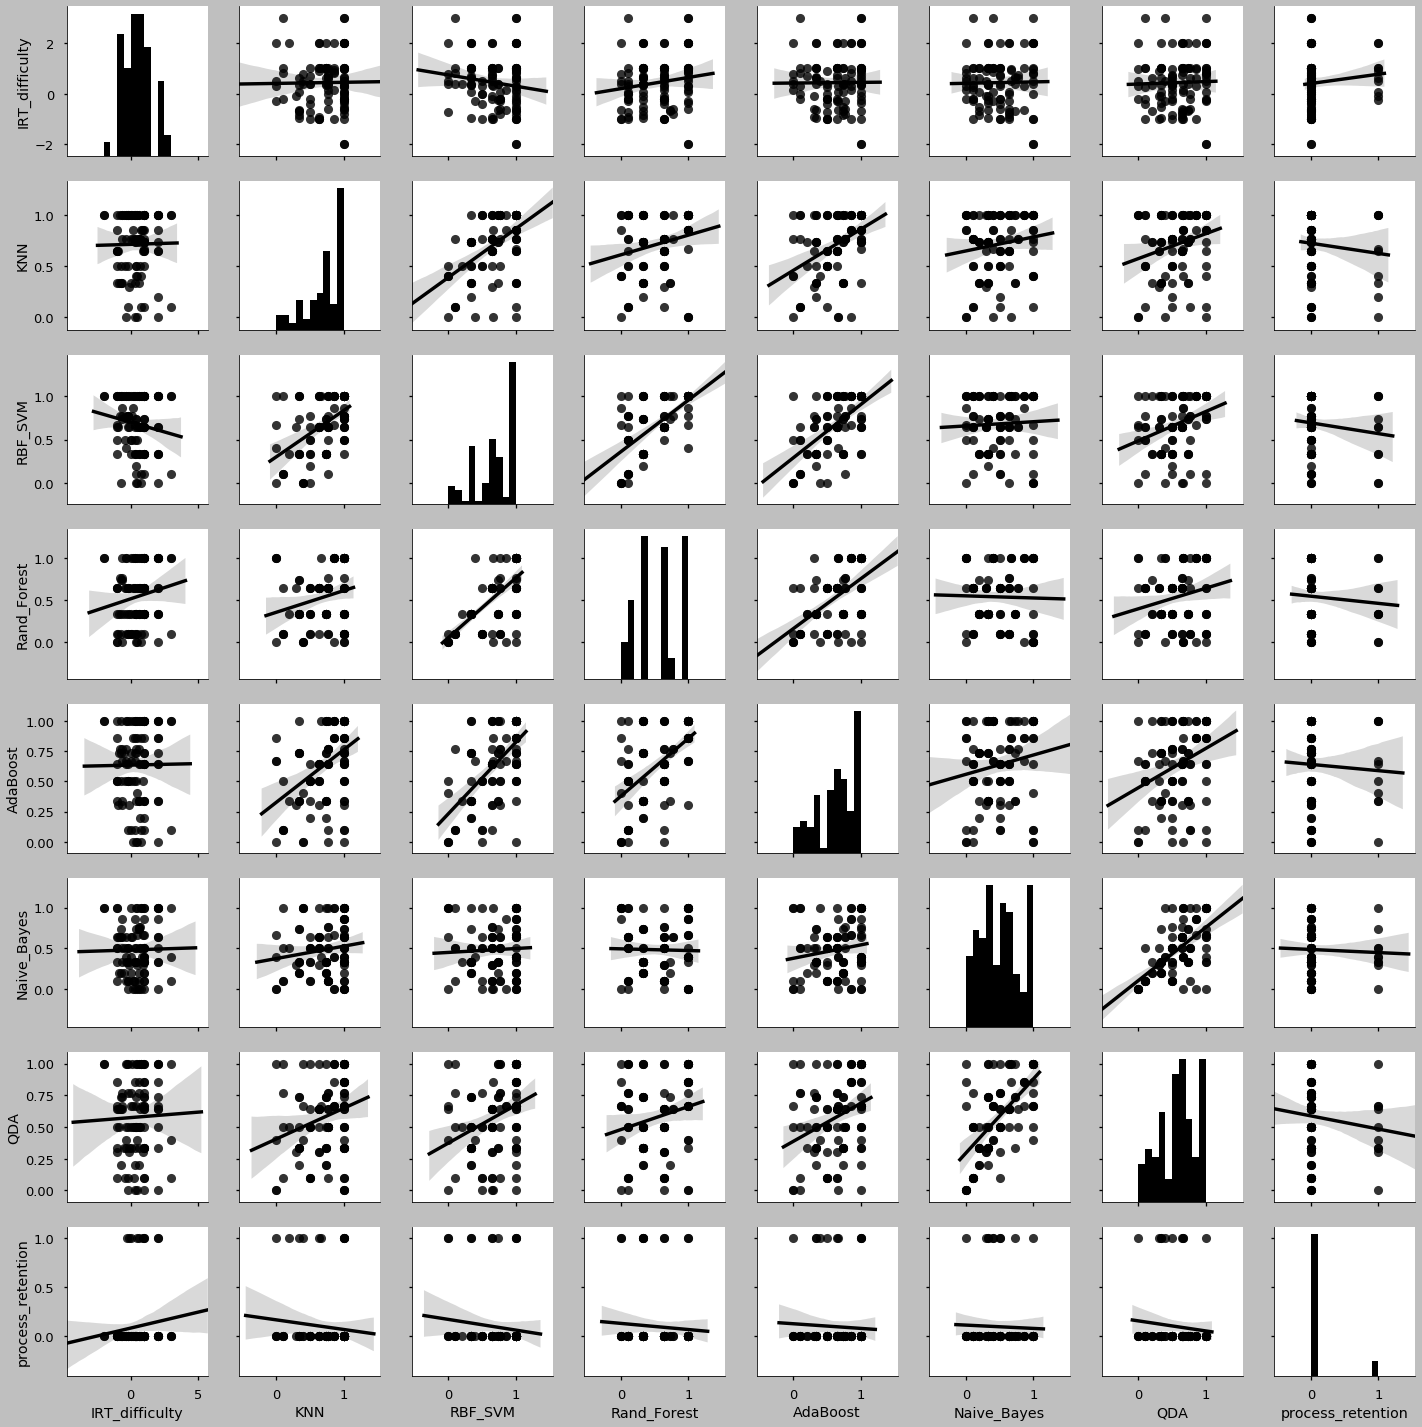

In [17]:
sns.pairplot(dat_heat.iloc[:,:-1], kind="reg")